This is a demonstration script of the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) using a [matplotlib animated histogram](https://matplotlib.org/3.2.2/gallery/animation/animated_histogram.html) within a kaggle notebook, which I got working with the help of the notebook ["Testing matplotlib animation"](https://www.kaggle.com/mrisdal/testing-matplotlib-animation) by [Meg Risdal](https://www.kaggle.com/mrisdal).

The idea behind this is to take [random samples from a uniform distribution](https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.uniform.html), here each time I take 25 numbers between $[-0.5,0.5)$, calculate the mean value of these 25 samples, and add this mean value to a list. The idea is that the eventually the a plot of these mean values will converge to form a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) whose [expectation value](https://en.wikipedia.org/wiki/Expected_value) will lie in the middle of the distribution, which in this case is zero.

#### Just press play...

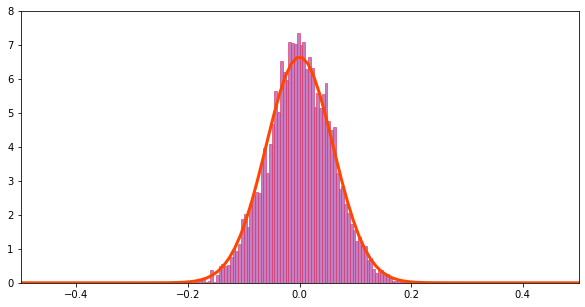

In [1]:
%matplotlib inline
from matplotlib import  rc
from IPython.display import HTML
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot    as plt
import matplotlib.patches   as patches
import matplotlib.path      as path
import matplotlib.animation as animation
import scipy.stats
from scipy.stats import norm

#===========================================================================
# initial setup
#===========================================================================
data     = 0
n_bins   = 200
n, bins  = np.histogram(data, n_bins)
meanList = []
x_min    = -0.5
x_max    =  0.5

#===========================================================================
# get the corners of the rectangles for the histogram
#===========================================================================
left   = np.array(bins[:-1])
right  = np.array(bins[1:])
bottom = np.zeros(len(left))
top    = bottom + n
nrects = len(left)
nverts = nrects * (1 + 3 + 1)
verts  = np.zeros((nverts, 2))
codes  = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom
patch = None

#===========================================================================
# what to plot in each frame
#===========================================================================
def animate(i):
    global meanList
    for i in range(30):
        # sample 25 random values between -0.5 and 0.5 from a uniform dist. 
        values =  np.random.default_rng().uniform(-0.5,0.5,25)
        # calculate the mean of these 25 values
        mean = sum(values) / 25
        # add this new mean value to my list
        meanList.append(mean)
    n, bins = np.histogram(meanList, 200,range=(x_min,x_max),density=True)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

#===========================================================================
# what each plot looks like
#===========================================================================
fig, ax = plt.subplots(figsize=(10, 5))
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='darkmagenta', edgecolor='crimson', alpha=0.5)
ax.add_patch(patch)
ax.set_xlim(x_min,x_max)
ax.set_ylim(0,8)
# also plot a normal curve on top
x = np.linspace(x_min, x_max, 100)
meanValue = 0.
std       = 0.06
y         = scipy.stats.norm.pdf(x,meanValue,std)
ax.plot(x,y, color='orangered',linewidth=3);

#===========================================================================
# make the animation
#===========================================================================
n_frames = 200
anim = animation.FuncAnimation(fig, animate, n_frames, repeat=True, blit=False)
HTML(anim.to_jshtml())

**Acknowledgements**:
This notebook was produced with the help of [Pranav Kasela](https://www.kaggle.com/pranavkasela).